# 6) Application sur le jeu de données $DIGIT$ :

Dans cette question, nous allons reprendre les questions précédentes en les appliquant sur le jeu de données $Digit$, disponible dans le module $sklearn.datasets$.

### Préparation de données

In [64]:
from sklearn.datasets import load_digits

digits = load_digits()

In [65]:
# Création des données et leurs labels correspondant.
X = digits.data
y = digits.target

In [66]:
X.shape

(1797, 64)

In [67]:
y.data.shape

(1797,)

<Figure size 1080x576 with 0 Axes>

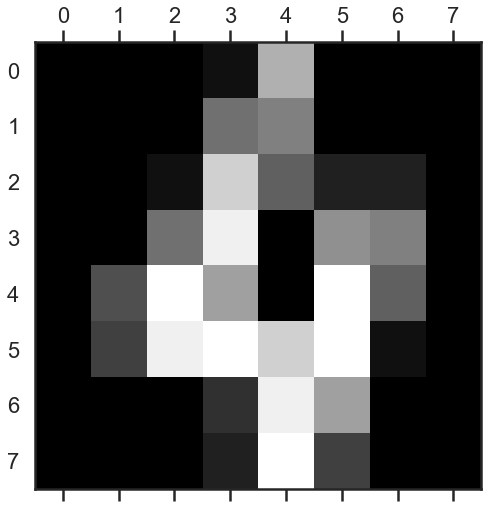

In [68]:
# Exemple d'un élément du jeu de données digit.images.

plt.gray() 
plt.matshow(digits.images[4]) 
plt.show()

In [69]:
# Decision tree classifier pour les critères gini et entropy :

mytree1 = tree.DecisionTreeClassifier(criterion = 'gini')
mytree2 = tree.DecisionTreeClassifier(criterion = 'entropy')

# Nous créons une partie test-set (20%) et train-set (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




Construction du classificateur d'arbre de décision à partir de l'échantillon d'apprentissage (train set) :

In [70]:
mytree1.fit(X_train, y_train)
mytree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Prédiction des classes des valeurs du jeu de données :

In [71]:
mytree1.predict(digits.data[-1:])

array([8])

### Calcul des erreurs de classification en fonction de la profondeur :

##### Pour le critère Gini :

In [76]:
test_err_gini = []

for i in range(80):    
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i + 1, random_state = 124)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    test_err_gini.append(1. - np.sum(y_predict == y_test) / y_predict.shape)
    

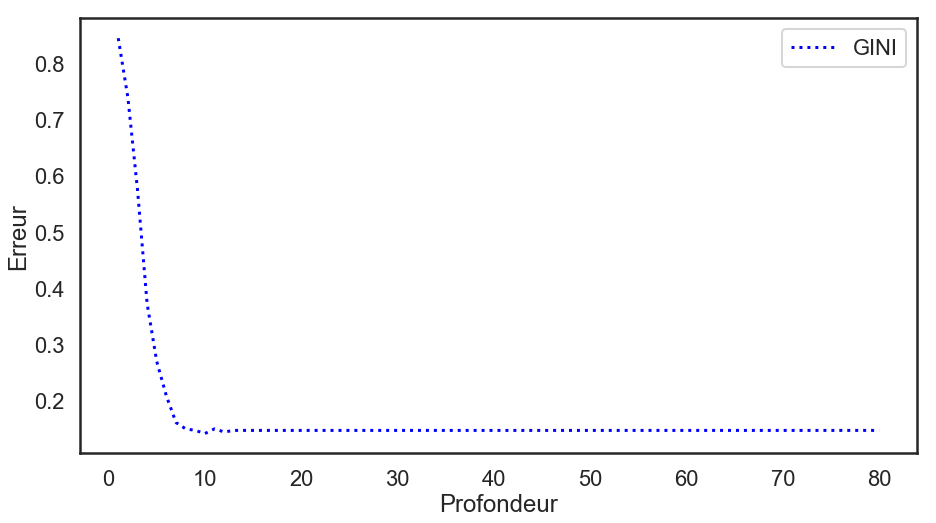

In [73]:
absc_gini = range(1, len(test_err) + 1) #abscices gini
plt.plot(absc_gini, test_err_gini,"g:", c = 'blue', label = "GINI")

plt.xlabel("Profondeur")
plt.ylabel("Erreur")

plt.legend()
plt.show()

##### Pour le critère $Entropy$

In [74]:
test_err_entropy = []

for i in range(80):    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i + 1, random_state = 124)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    test_err_entropy.append(1. - np.sum(y_predict == y_test) / y_predict.shape)
    

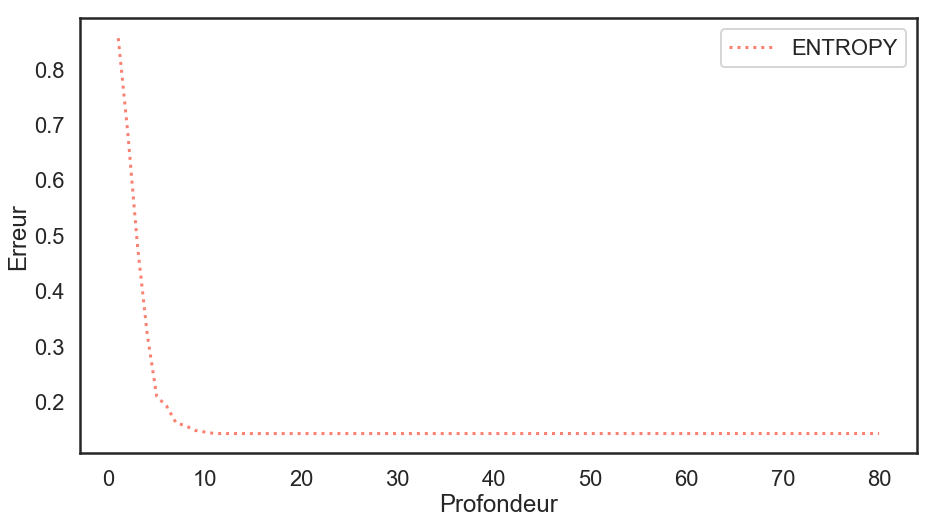

In [75]:
absc_entropy = range(1, len(test_err) + 1) #abscices entropy
plt.plot(absc_entropy, test_err_entropy,"g:", c = 'salmon', label = "ENTROPY")

plt.xlabel("Profondeur")
plt.ylabel("Erreur")

plt.legend()
plt.show()

# Affichage du classifieur pour deux variables

C:\Users\Mouad\Desktop\TOUT\Anac\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


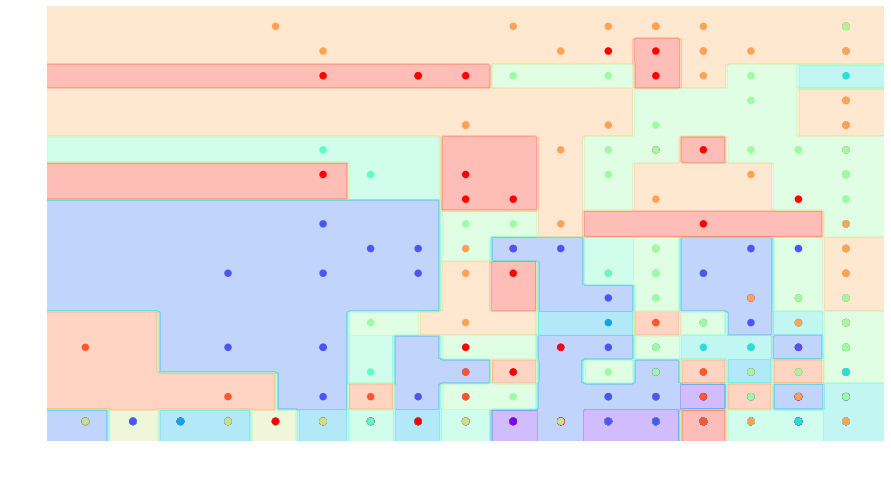

In [61]:
#pour deux lignes de pixels
Xpix = X_train[:,[4,6]]
visualize_classifier(clf1, Xpix, y_train)

# 7)-Cross validation score sur le jeu de données DIGITS

Nous utilisons la fonction $sklearn.cross$ _ $validation.cross$ _ $val$ _ $score$ pour la tester sur le jeu de données $digit$ en faisant varier la profondeur de l'arbre de décision.

Importation des package nécessaires:

In [78]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score

In [82]:
# Calcul de la précision du classifieur classique :

print(mytree1.score(X_test,y_test), "% des chiffres sont classées correctement")


# Calcul de la précision du classifieur en utilisant la validation croisée :

results1 = cross_val_score(mytree1, X, y, cv=10)

print("moyenne de la précision : %0.2f (+/- %0.2f)" % (results1.mean(), results1.std() * 2))

0.8583333333333333 % des chiffres sont classées correctement
moyenne de la précision : 0.83 (+/- 0.07)


#### Calcul de la profondeur optimale du classifieur avec la validation croisée :

In [84]:
CV_err = []

for i in range(80):    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i + 1, random_state = 124)
    results1 = cross_val_score(clf, X, y, cv = 10)
    CV_err.append(1. - results1.mean())
    
    
print("La profondeur optimal:", np.argmin(test_err) + 1)

La profondeur optimal: 13


## 8) Courbe d'apprentissage $(Learning$ $curve)$ :

#### Dans cette question, nous allons afficher la courbe d'apprentissage $(Learning$ $Curve)$, pour les arbres de décisions sur le jeu de données $Digit$ :

In [88]:
# packages necessaires

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#### Nous allons implémenter la fonction $plot$_$learning$_$curve$, disponible sur : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html, pour afficher la courbe d'apprentissage :

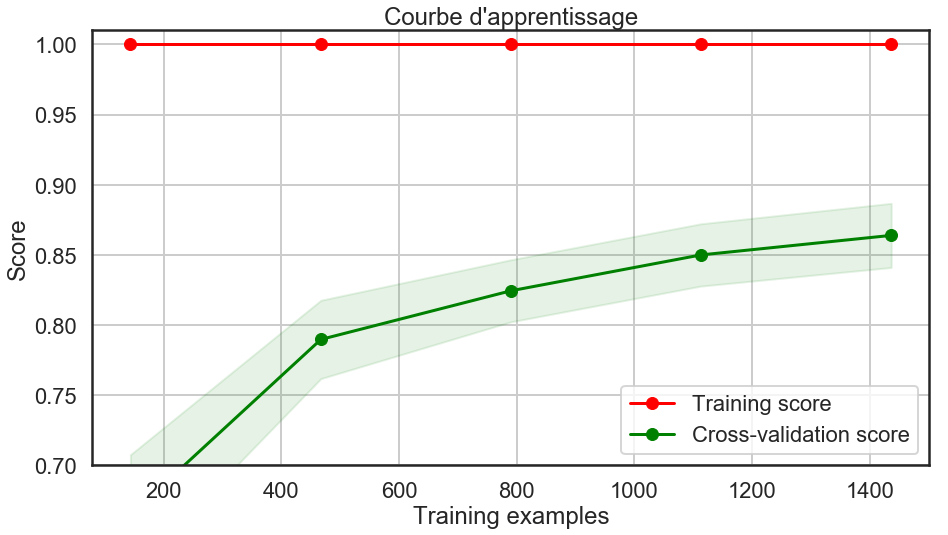

In [91]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



X, y = digits.data, digits.target


title = "Courbe d'apprentissage"


# Validation croiée avec 100 itérations pour un meilleur lissage de la courbe d'apprentissage
# Selection aléatoire à chaque itération de 20% des données comme l'échantillon test :
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)



# Application de la fonction sur notre jeu de données :
estimator = clf
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

# Annexe/Brouillon

#### Voici un autre essai de la visualisation de la Q3 :

In [1]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')

plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')

plt.legend()
plt.show()

NameError: name 'X_train' is not defined